In [6]:
from sympy import symbols, Matrix, eye, sin, cos, pi, pprint, diff
import sympy as sym
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import lu
from mpl_toolkits.mplot3d import axes3d, Axes3D

q1, q2, q3, q4, q5, q6, q7 = symbols('theta_1 theta_2 theta_3 theta_4 theta_5 theta_6 theta_7')
joint_angles = [q1, q2, q3, q4, q5, q6, q7]

dh_param = [
    {'a':  0,      'd': 0.333, 'alpha':  pi/2,'q': q1},
    {'a':  0,      'd': 0,     'alpha': -pi/2,'q': q2},
    {'a':  0.088,  'd': 0.316, 'alpha': -pi/2,'q': 0},
    {'a':  -0.088, 'd': 0,     'alpha':  pi/2,'q': q4},
    {'a':  0,      'd': 0.384, 'alpha':  pi/2,'q': q5},
    {'a':  0.088,  'd': 0,     'alpha': -pi/2,'q': q6},
    {'a':  0,      'd': -0.207, 'alpha':  0,'q': q7},
]

T = []
rotational_component = []
linear_component = []

for i, p in enumerate(dh_param):
    d = p['d']
    a = p['a']
    q = p['q']
    alpha = p['alpha']

    transform =  Matrix([[cos(q),-sin(q)*cos(alpha),sin(q)*sin(alpha),a*cos(q)],
                           [sin(q),cos(q)*cos(alpha),-cos(q)*sin(alpha),a*sin(q)],
                           [0,sin(alpha),cos(alpha),d],
                           [0,0,0,1]])
    T.append(transform)

    rotational_component.append(transform[0:3,3])
    linear_component.append(transform[0:3,2])

T01 = T[0]
T02 = T[0] * T[1]
T03 = T[0] * T[1] * T[2] 
T04 = T[0] * T[1] * T[2] * T[3] 
T05 = T[0] * T[1] * T[2] * T[3] * T[4] 
T06 = T[0] * T[1] * T[2] * T[3] * T[4] * T[5] 
T07 = T[0] * T[1] * T[2] * T[3] * T[4] * T[5] * T[6]



Z0 = T01[:3,2]
Z1 = T02[:3,2]
Z2 = T04[:3,2]
Z4 = T05[:3,2]
Z5 = T06[:3,2]
Z6 = T06[:3,2]



dq1 = T07[:3,3].diff(q1)
dq2 = T07[:3,3].diff(q2)
dq4 = T07[:3,3].diff(q4)
dq5 = T07[:3,3].diff(q5)
dq6 = T07[:3,3].diff(q6)
dq7 = T07[:3,3].diff(q7)

Jacob_matrix = Matrix([(dq1,dq2,dq4,dq5,dq6,dq7),
                        (Z0,Z1,Z2,Z4,Z5,Z6)])

print("Init Jacobian Matrix")
Jacob_matrix

Init Jacobian Matrix


Matrix([
[(0.088*(-sin(theta_1)*sin(theta_2)*sin(theta_4) - sin(theta_1)*cos(theta_2)*cos(theta_4))*cos(theta_5) - 0.088*sin(theta_5)*cos(theta_1))*cos(theta_6) + (0.207*(-sin(theta_1)*sin(theta_2)*sin(theta_4) - sin(theta_1)*cos(theta_2)*cos(theta_4))*cos(theta_5) - 0.207*sin(theta_5)*cos(theta_1))*sin(theta_6) + (-0.207*sin(theta_1)*sin(theta_2)*cos(theta_4) + 0.207*sin(theta_1)*sin(theta_4)*cos(theta_2))*cos(theta_6) + (0.088*sin(theta_1)*sin(theta_2)*cos(theta_4) - 0.088*sin(theta_1)*sin(theta_4)*cos(theta_2))*sin(theta_6) + 0.088*sin(theta_1)*sin(theta_2)*sin(theta_4) + 0.384*sin(theta_1)*sin(theta_2)*cos(theta_4) + 0.316*sin(theta_1)*sin(theta_2) - 0.384*sin(theta_1)*sin(theta_4)*cos(theta_2) + 0.088*sin(theta_1)*cos(theta_2)*cos(theta_4) - 0.088*sin(theta_1)*cos(theta_2), (-0.088*sin(theta_2)*sin(theta_4)*cos(theta_1) - 0.088*cos(theta_1)*cos(theta_2)*cos(theta_4))*sin(theta_6) + (0.207*sin(theta_2)*sin(theta_4)*cos(theta_1) + 0.207*cos(theta_1)*cos(theta_2)*cos(theta_4))*cos(th

In [12]:
x_data = []
y_data = []
z_data = []

q = Matrix([[0],[0],[math.radians(90)],[0],[math.radians(180)],[0]]).evalf()  

for i in range(101):
  x_d = 0  
  y_d = 0.04*pi*cos((2*pi/100)*i)                 
  z_d = -0.04*pi*sin((2*pi/100)*i)                
  Velocity = Matrix([x_d,y_d,z_d,0,0,0]).evalf()       
  
  J_Final = T07.subs({q1:q[0,0],q2:q[1,0],q4:q[2,0],q5:q[3,0],q6:q[4,0],q7:q[5,0]}).evalf()     
  J_Final = np.array(J_Final)  
  x_data.append(J_Final[0][3])
  y_data.append(J_Final[1][3])
  z_data.append(J_Final[2][3])
                                                                                         
  J_F = Jacob_matrix.subs({q1:q[0,0],q2:q[1,0],q3:0,q4:q[2,0],q5:q[3,0],q6:q[4,0],q7:q[5,0]}).evalf()

  p,l,u = lu(J_F, permute_l = False)
  l = np.dot(p,l) 
  l_inv = np.linalg.inv(l)
  u_inv = np.linalg.inv(u)
  J_inv = np.dot(u_inv,l_inv)
    
  q = q + (J_inv * Velocity * 0.05)                                                         
print("END")

END


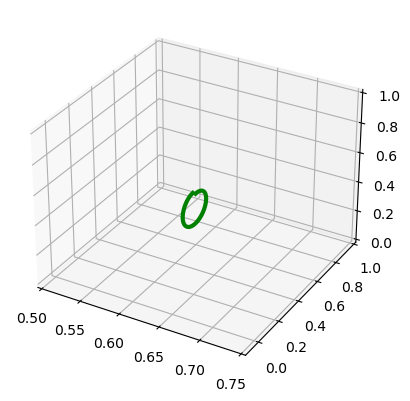

In [23]:
axs = plt.axes(projection = '3d')

axs.axes.set_xlim3d(left=0.5, right=0.75)
axs.axes.set_ylim3d(bottom=-0.1, top=1)
axs.axes.set_zlim3d(bottom=0, top=1)


axs.plot3D(x_data, y_data, z_data, 'green', linewidth=3.0)

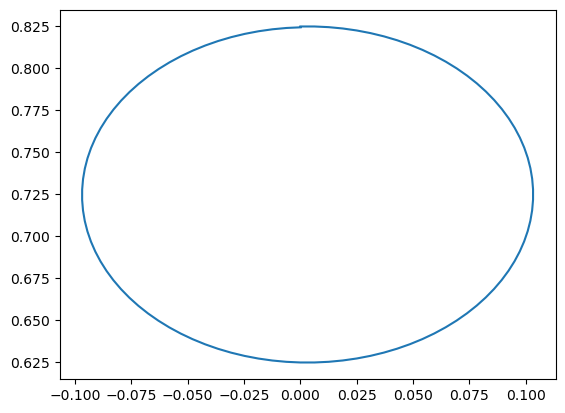

In [14]:
plt.plot(y_data,z_data)
plt.show()